In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [3]:
batch_size=128
num_classes=10
epochs=20

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)

Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [5]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [6]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [7]:
xtrain=xtrain/255.
xtest=xtest/255.

# Print the shape of data

In [8]:
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

60000 train samples
10000 test samples


# Convert class vectors to binary class matrices

In [9]:
import keras

ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [10]:
ytrain.shape

(60000, 10)

# Sequential Model

In [11]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# Fit the model

In [13]:
histroy=model.fit(xtrain,ytrain,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=2,
                 validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 7s - loss: 0.2297 - accuracy: 0.9298 - val_loss: 0.1013 - val_accuracy: 0.9679 - 7s/epoch - 14ms/step
Epoch 2/20
469/469 - 5s - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0788 - val_accuracy: 0.9749 - 5s/epoch - 11ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0654 - val_accuracy: 0.9804 - 5s/epoch - 11ms/step
Epoch 4/20
469/469 - 5s - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0609 - val_accuracy: 0.9822 - 5s/epoch - 11ms/step
Epoch 5/20
469/469 - 5s - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0652 - val_accuracy: 0.9818 - 5s/epoch - 11ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0672 - val_accuracy: 0.9837 - 5s/epoch - 11ms/step
Epoch 7/20
469/469 - 5s - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0788 - val_accuracy: 0.9822 - 5s/epoch - 11ms/step
Epoch 8/20
469/469 - 5s - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0707 - val_accuracy: 0.9844 - 5s/epoch - 11ms/step
Epoch 9/20
469/4

In [14]:
print('Test Loss:\t',score[0])
print('Test Accuracy:\t',score[1])

Test Loss:	 0.08714190870523453
Test Accuracy:	 0.9860000014305115


# Task 1: Experiment with Model Architecture

In [15]:
# Modify the model architecture by adding more layers or changing the number of neurons
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(256, activation='relu'))  # Adding another layer
model.add(Dense(128, activation='relu'))  # Adding another layer
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 56743

# Task 2: Hyperparameter Tuning

In [16]:
# Experiment with different hyperparameters such as learning rate, batch size, and epochs
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=64, epochs=30, verbose=2, validation_data=(xtest, ytest))

Epoch 1/30
938/938 - 9s - loss: 0.2513 - accuracy: 0.9234 - val_loss: 0.1186 - val_accuracy: 0.9643 - 9s/epoch - 10ms/step
Epoch 2/30
938/938 - 9s - loss: 0.1109 - accuracy: 0.9682 - val_loss: 0.1050 - val_accuracy: 0.9693 - 9s/epoch - 10ms/step
Epoch 3/30
938/938 - 8s - loss: 0.0869 - accuracy: 0.9751 - val_loss: 0.0774 - val_accuracy: 0.9800 - 8s/epoch - 9ms/step
Epoch 4/30
938/938 - 8s - loss: 0.0700 - accuracy: 0.9801 - val_loss: 0.0784 - val_accuracy: 0.9784 - 8s/epoch - 8ms/step
Epoch 5/30
938/938 - 8s - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.0723 - val_accuracy: 0.9821 - 8s/epoch - 8ms/step
Epoch 6/30
938/938 - 8s - loss: 0.0534 - accuracy: 0.9850 - val_loss: 0.0749 - val_accuracy: 0.9811 - 8s/epoch - 8ms/step
Epoch 7/30
938/938 - 8s - loss: 0.0486 - accuracy: 0.9864 - val_loss: 0.0880 - val_accuracy: 0.9811 - 8s/epoch - 8ms/step
Epoch 8/30
938/938 - 8s - loss: 0.0463 - accuracy: 0.9879 - val_loss: 0.0745 - val_accuracy: 0.9815 - 8s/epoch - 8ms/step
Epoch 9/30
938/938 - 8

# Task 3: Regularization

In [18]:
# Implement dropout for regularization
model.add(Dropout(0.2))

# Task 4: Visualizations

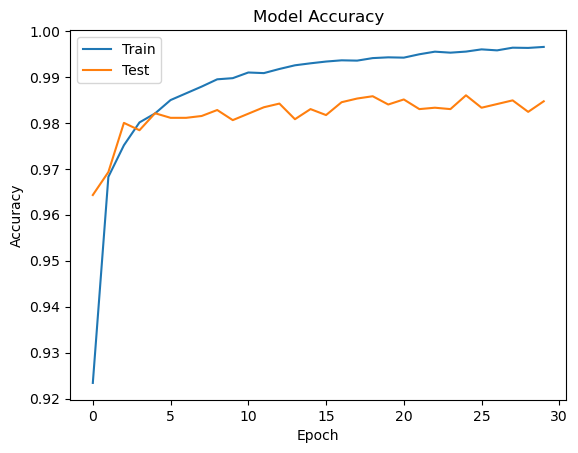

In [19]:
# Add code to visualize the training history
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 5: Transfer Learning

In [20]:
# Using a pre-trained model (e.g., VGG16) and adapt it for the MNIST classification task
from keras.applications import VGG16
from keras.layers import Flatten

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))  # Adjust input shape as needed

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))  # Adjust input shape as needed
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

58889256/58889256 [==============================] - 9s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1769728   
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1772298 (6.76 MB)
Trainable params: 1772298 (6.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
